In [1]:
import pandas as pd
import numpy as np

In [4]:

url ="https://raw.githubusercontent.com/ShilpaSayuraML/data-science-mastsr/master/data/ted_main.csv"

ted_data = pd.read_csv(url)
ted_data.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [5]:
# Let's have a look how many values are missing.
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [6]:
#Lets have a look at the data and see identify Object/Categorial values and Continuous values
ted_data.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

Looking at the snapshot of the data, the name column contains the 
title of ted talks too. There are already seperate columns for name(main speaker) and title. 
We can drop this extra column.

In [7]:
#Drop the name column
ted_data = ted_data.drop(['name'], axis = 1)
ted_data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'num_speaker', 'published_date', 'ratings',
       'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views'],
      dtype='object')

Looking at the data, the dates are in Unix timestamp format. Let get that formatted too in datetime format.

In [8]:
from datetime import datetime
def convert(x):
    return pd.to_datetime(x,unit='s')

In [9]:
ted_data['film_date'] = ted_data['film_date'].apply(convert)
ted_data['published_date'] = ted_data['published_date'].apply(convert)
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Some columns contain data in dictionary and list format. We will not look at those column yet.

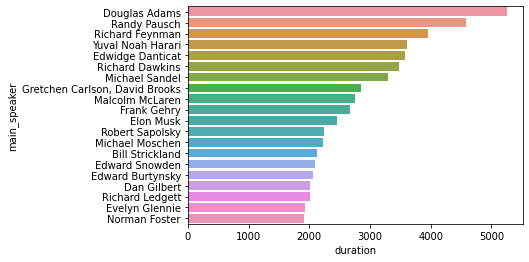

In [10]:
#Lets see who talked a lot - top 20
import seaborn as sns
ax = sns.barplot(x="duration", y="main_speaker", data=ted_data.sort_values('duration', ascending=False)[:20])

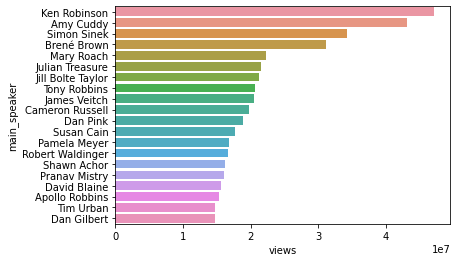

In [11]:
#Let's see which video got the most views
ax = sns.barplot(x="views", y="main_speaker", data=ted_data.sort_values('views', ascending=False)[:20])

I can see the some imilar names in both the plots. Looking at both the plots it seems,
the long talks got more views? Let's try and verify it.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


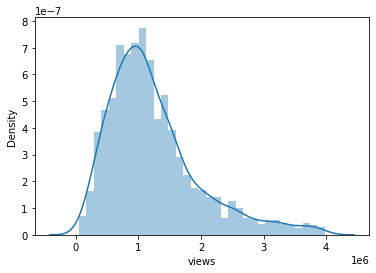

In [12]:
#let's see the distribution of views
sns.distplot(ted_data[ted_data['views'] < 0.4e7]['views'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


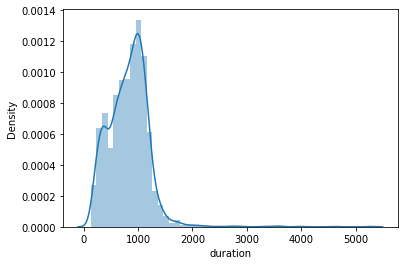

In [13]:
#let's see the distribution of duration
sns.distplot(ted_data[ted_data['duration'] < 0.4e7]['duration'])

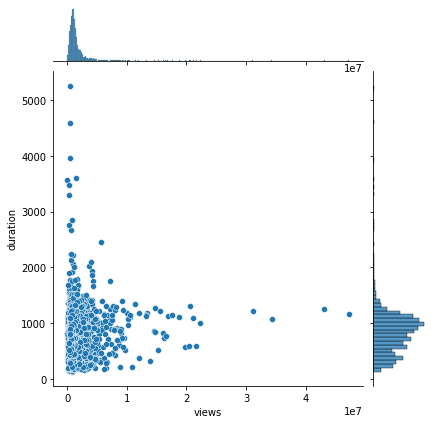

In [14]:
ax = sns.jointplot(x='views', y='duration', data=ted_data)

Seems like we were wrong. There is no relationship with the length and duration.

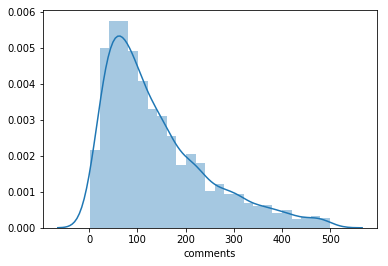

In [ ]:
#Lets see the ditribution of comments.
sns.distplot(ted_data[ted_data['comments'] < 500]['comments'])

Do you think most viewed videos/popular videos will have more comments?

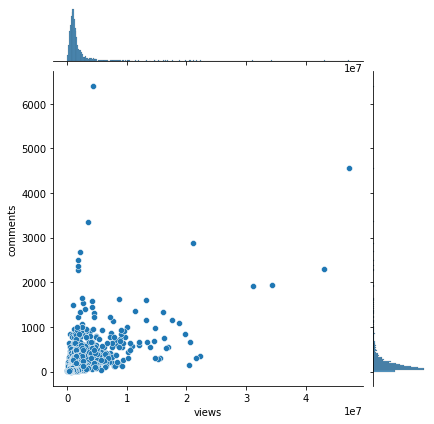

In [15]:
sns.jointplot(x='views', y='comments', data=ted_data)

Seems like we have found a relationship here.

Let's see if our top speakers have got more discussion/ comments?

In [16]:
ted_data[['title', 'main_speaker','views', 'comments', 'duration']].sort_values('views', ascending=False).head(20)

,title,main_speaker,views,comments,duration
0,Do schools kill creativity?,Ken Robinson,47227110,4553,1164
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,1262
677,How great leaders inspire action,Simon Sinek,34309432,1930,1084
837,The power of vulnerability,Brené Brown,31168150,1927,1219
452,10 things you didn't know about orgasm,Mary Roach,22270883,354,1003
1776,How to speak so that people want to listen,Julian Treasure,21594632,297,598
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,1099
5,Why we do what we do,Tony Robbins,20685401,672,1305
2114,This is what happens when you reply to spam email,James Veitch,20475972,150,588
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,846,577


Looking at the data above, Richard Dawkins has not got many views but has
got a lot comments looks like his topic was controversial.

Now lets try and find out when ted talk were filmed the most

In [17]:
ted_data.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


In [18]:
talk_month = pd.DataFrame(ted_data['film_date'].map(lambda x: x.month).value_counts()).reset_index()
talk_month.columns = ['month', 'talks']
talk_month.head()

,month,talks
0,2,601
1,3,397
2,6,270
3,7,253
4,11,232


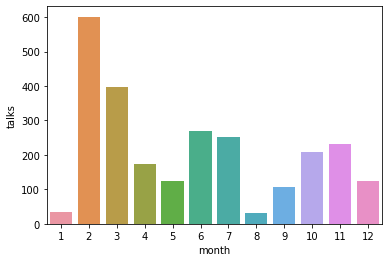

In [19]:
sns.barplot(x='month', y='talks', data=talk_month)